Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler #to standarize our data
from sklearn.model_selection import train_test_split
from sklearn import svm #support vector machine
from sklearn.metrics import accuracy_score


Data collection and analysis using PIMA Diabetes Datasets(females)

In [2]:
#loading the datasets to a pandas dataframe
diabetes_dataset = pd.read_csv("/content/diabetes.csv")

In [5]:
#printing the first five rows of the datasets

diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# number of rows and coloumns
diabetes_dataset.shape

(768, 9)

In [7]:
#getting the statiscal measures of the data

diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 --> Non Diabetic
1 --> Diabetic

In [10]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
#seperating the datas and label

X = diabetes_dataset.drop(columns ='Outcome', axis = 1)
Y = diabetes_dataset['Outcome']

In [13]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [14]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [15]:
scalar = StandardScaler()

In [16]:
scalar.fit(X)

StandardScaler()

In [17]:
standardized_data = scalar.transform(X)

In [18]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [19]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [21]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Splitting the datas

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, stratify=Y, random_state=15)
# splitting data on 2 array
#0.2 represents 20% of data as test datas
#random state for rnadom partitioning datas

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model

In [24]:
classifier = svm.SVC(kernel = 'linear')
#svc is support vector classifier

#trainng the svm  classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Evaluating the dataset

FInding the accuracy score

In [26]:
#accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [27]:
print("Accuracy score of the training data :",training_data_accuracy)

Accuracy score of the training data : 0.7850162866449512


In [32]:
#accuracy data on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print("Accuracy score of the training data :",test_data_accuracy)

Accuracy score of the training data : 0.7597402597402597


Making a prediciton system

In [40]:
# Making a prediction system
input_data = (3, 126, 88, 41, 235, 39.3, 0.704, 27)

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Use column names from the original dataset
input_data_df = pd.DataFrame(input_data_reshaped, columns=diabetes_dataset.drop(columns='Outcome').columns)

# Standardize the input data using the fitted scaler
std_data = scalar.transform(input_data_df)
print(std_data)

# Predict using the standardized data
prediction = classifier.predict(std_data)
print(prediction)

if prediction[0] == 0:
    print("The person is non-diabetic")
else:
    print("The person is diabetic")


[[-0.25095213  0.1597866   0.97680475  1.28363829  1.34758997  0.92745247
   0.70104112 -0.53102292]]
[0]
The person is non-diabetic


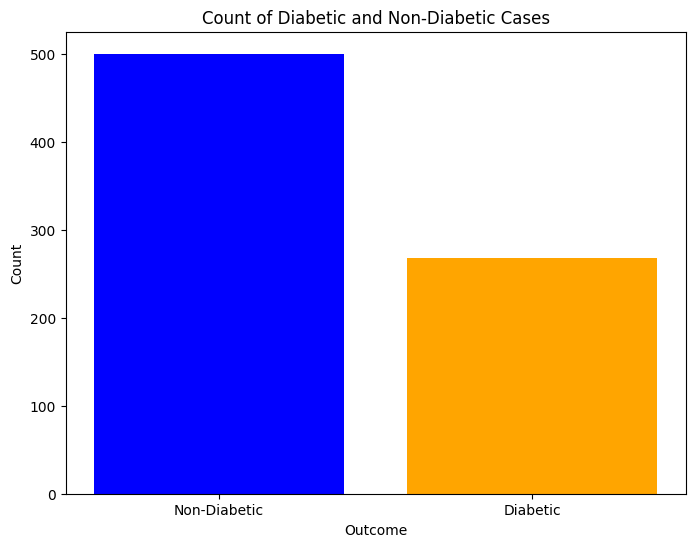

In [41]:
# creating the graph or learning to create a graph for total normal of cases
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = diabetes_dataset['Outcome'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Count of Diabetic and Non-Diabetic Cases')
plt.xticks(ticks=[0, 1], labels=['Non-Diabetic', 'Diabetic'])
plt.show()


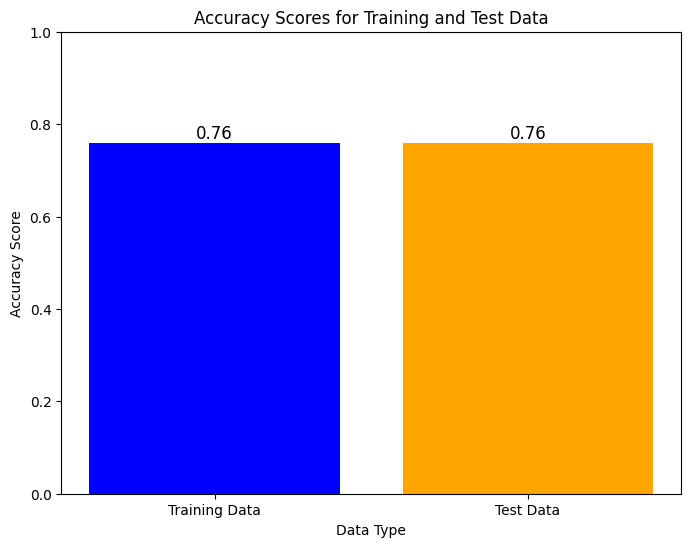

In [44]:
#graph for accuracy score

# accuracy scores
accuracy_scores = {
    'Training Data': training_data_accuracy,
    'Test Data': test_data_accuracy
}

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'orange'])

# Allocating each bar with the accuracy value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12)

plt.xlabel('Data Type')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Training and Test Data')
plt.ylim(0, 1)  # Accuracy scores range from 0 to 1
plt.show() # Accuracy scores range from 0 to 1
plt.show()
